<a href="https://colab.research.google.com/github/alissonwr/analise_perda/blob/main/Analise_indice_perda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('/content/Desagregado-20241010204252.csv', encoding='ISO-8859-1', delimiter=';' or ',')
df_filter = df[['Município', 'AG006 - Volume de água produzido', 'AG010 - Volume de água consumido', 'AG018 - Volume de água tratada importado', 'AG024 - Volume de serviço']]
display(df_filter)
print(df_filter.dtypes)


,Município,AG006 - Volume de água produzido,AG010 - Volume de água consumido,AG018 - Volume de água tratada importado,AG024 - Volume de serviço
0,Água Branca,"219,75","109,83",0,"3,88"
1,Água Branca,"218,69","70,61",0,"102,78"
2,Água Branca,"199,23","72,79",0,"12,95"
3,Água Branca,"216,38","130,12",0,"10,82"
4,Aguiar,"228,51","132,64",0,"4,9"
...,...,...,...,...,...
796,Vista Serrana,"120,25","72,21",0,"5,12"
797,Vista Serrana,"153,28","74,52",0,"29,8"
798,Vista Serrana,"156,77","76,65",0,"10,19"
799,Vista Serrana,"135,94","76,67",0,0


Município                                   object
AG006 - Volume de água produzido            object
AG010 - Volume de água consumido            object
AG018 - Volume de água tratada importado     int64
AG024 - Volume de serviço                   object
dtype: object


In [51]:
# Lista das colunas que você deseja converter
colunas_numericas = ['AG006 - Volume de água produzido',
                     'AG010 - Volume de água consumido',
                     'AG018 - Volume de água tratada importado',
                     'AG024 - Volume de serviço']

# Limpar e substituir a vírgula por ponto
for coluna in colunas_numericas:
    df_filter[coluna] = df_filter[coluna].replace({',': '.', ' ': ''}, regex=True)

# Convertendo as colunas para numérico
df_filter[colunas_numericas] = df_filter[colunas_numericas].apply(pd.to_numeric, errors='coerce')

# Verifique se a conversão foi bem-sucedida
print(df_filter.dtypes)

Município                                    object
AG006 - Volume de água produzido            float64
AG010 - Volume de água consumido            float64
AG018 - Volume de água tratada importado      int64
AG024 - Volume de serviço                   float64
dtype: object


<ipython-input-51-b82ce4f2f5a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[coluna] = df_filter[coluna].replace({',': '.', ' ': ''}, regex=True)
<ipython-input-51-b82ce4f2f5a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter[colunas_numericas] = df_filter[colunas_numericas].apply(pd.to_numeric, errors='coerce')


In [52]:
df_filter['Índice de Perdas Na Distribuição'] = (
    (df_filter['AG006 - Volume de água produzido'] + df_filter['AG010 - Volume de água consumido']
     - df_filter['AG018 - Volume de água tratada importado'] - df_filter['AG024 - Volume de serviço'])
    / (df_filter['AG006 - Volume de água produzido'] + df_filter['AG018 - Volume de água tratada importado']
       - df_filter['AG024 - Volume de serviço'])
) * 100
# df_filter_indice_perdas_distribuicao = df_filter.groupby('Município').sum()
display(df_filter)

<ipython-input-52-cb86670c7a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Índice de Perdas Na Distribuição'] = (


,Município,AG006 - Volume de água produzido,AG010 - Volume de água consumido,AG018 - Volume de água tratada importado,AG024 - Volume de serviço,Índice de Perdas Na Distribuição
0,Água Branca,219.75,109.83,0,3.88,150.877843
1,Água Branca,218.69,70.61,0,102.78,160.917954
2,Água Branca,199.23,72.79,0,12.95,139.075585
3,Água Branca,216.38,130.12,0,10.82,163.300253
4,Aguiar,228.51,132.64,0,4.90,159.317562
...,...,...,...,...,...,...
796,Vista Serrana,120.25,72.21,0,5.12,162.720403
797,Vista Serrana,153.28,74.52,0,29.80,160.349854
798,Vista Serrana,156.77,76.65,0,10.19,152.292264
799,Vista Serrana,135.94,76.67,0,0.00,156.399882


In [53]:
# Exemplo: se você tem 4 anos de dados repetidos para cada município
anos = [2022, 2021, 2020, 2019]
num_anos = len(anos)
num_municipios = df_filter['Município'].nunique()  # Número de municípios únicos

# Cria uma lista de anos que se encaixa com o número total de entradas
anos_repetidos = anos * (len(df_filter) // num_anos) + anos[:len(df_filter) % num_anos]
df_filter['Ano de Referência'] = anos_repetidos

display(df_filter)

<ipython-input-53-4594c40f3a97>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['Ano de Referência'] = anos_repetidos


,Município,AG006 - Volume de água produzido,AG010 - Volume de água consumido,AG018 - Volume de água tratada importado,AG024 - Volume de serviço,Índice de Perdas Na Distribuição,Ano de Referência
0,Água Branca,219.75,109.83,0,3.88,150.877843,2022
1,Água Branca,218.69,70.61,0,102.78,160.917954,2021
2,Água Branca,199.23,72.79,0,12.95,139.075585,2020
3,Água Branca,216.38,130.12,0,10.82,163.300253,2019
4,Aguiar,228.51,132.64,0,4.90,159.317562,2022
...,...,...,...,...,...,...,...
796,Vista Serrana,120.25,72.21,0,5.12,162.720403,2022
797,Vista Serrana,153.28,74.52,0,29.80,160.349854,2021
798,Vista Serrana,156.77,76.65,0,10.19,152.292264,2020
799,Vista Serrana,135.94,76.67,0,0.00,156.399882,2019


<Figure size 2600x800 with 0 Axes>

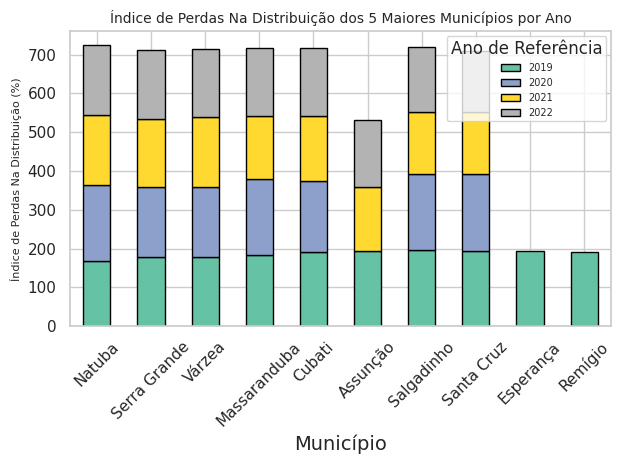

In [78]:
perdas_por_ano_municipio = df_filter.groupby(['Ano de Referência', 'Município'])['Índice de Perdas Na Distribuição'].mean().reset_index()

# Obter os 5 municípios com maior média de índice de perdas
top_municipios = perdas_por_ano_municipio.groupby('Município')['Índice de Perdas Na Distribuição'].mean().nlargest(10).index
filtered_data = perdas_por_ano_municipio[perdas_por_ano_municipio['Município'].isin(top_municipios)]

# Criar um DataFrame pivoteado para o gráfico de barras empilhadas
pivot_df = filtered_data.pivot(index='Município', columns='Ano de Referência', values='Índice de Perdas Na Distribuição')

# Ordenar o DataFrame pivotado pelo índice de perdas médio
pivot_df = pivot_df.sort_values(by=pivot_df.columns[-1], ascending=False)  # Ordena pela última coluna (ano mais recente)

# Criar o gráfico de barras empilhadas com tamanho aumentado
plt.figure(figsize=(26, 8))  # Aumentando o tamanho do gráfico
pivot_df.plot(kind='bar', stacked=True, colormap='Set2', edgecolor='black')

plt.title('Índice de Perdas Na Distribuição dos 5 Maiores Municípios por Ano', fontsize=10)
plt.xlabel('Município', fontsize=14)
plt.ylabel('Índice de Perdas Na Distribuição (%)', fontsize=8)
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade
plt.legend(title='Ano de Referência', fontsize=7)
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

In [70]:
df_filter_municipio_group = df_filter.groupby('Município').sum()
display(df_filter_municipio_group)

,AG006 - Volume de água produzido,AG010 - Volume de água consumido,AG018 - Volume de água tratada importado,AG024 - Volume de serviço,Índice de Perdas Na Distribuição,Ano de Referência
Município,,,,,,
---,0.00,0.00,0,0.00,0.000000,2022
Aguiar,765.75,518.68,0,23.83,688.067626,8082
Alagoa Grande,0.00,3210.42,0,257.99,0.000000,8082
Alagoa Nova,1536.27,1029.10,0,49.12,685.909335,8082
Algodão de Jandaíra,0.00,0.00,0,0.00,0.000000,8082
...,...,...,...,...,...,...
Umbuzeiro,794.58,444.41,0,83.96,655.307047,8082
Vieirópolis,208.37,103.66,0,26.77,471.676301,8082
Vista Serrana,566.24,300.05,0,45.11,631.762403,8082
